# Proyecto final Talento Tech

**Estudiantes:**

Juan Sebastian Ladino Mendieta

Lizeth Daniela Castellanos Alfonso


# Punto 1
Despliegue de modelos de regresión lineal y clasificación utilizando Scikit-Learn y XGBoost

*   En estos modelos de clasificación y regresión es importante desplegar métodos de hiperparámetros como Grid Search y Random Search
*   Caso de estudio: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette("magma")

data = pd.read_csv('./data/Punto-1/riceClassification.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [202]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [203]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


## Analisis exploratorio de los datos

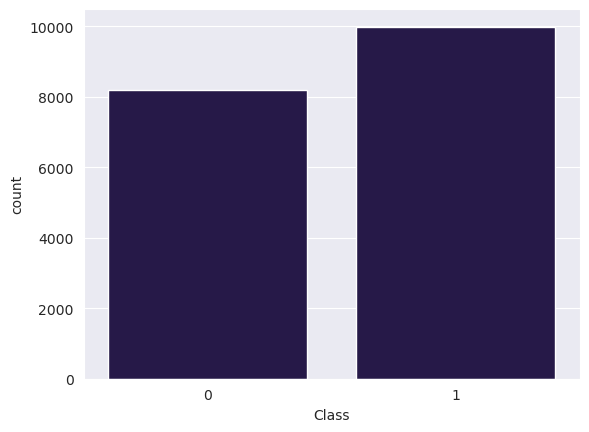

In [204]:
sns.countplot(data=data,x='Class');

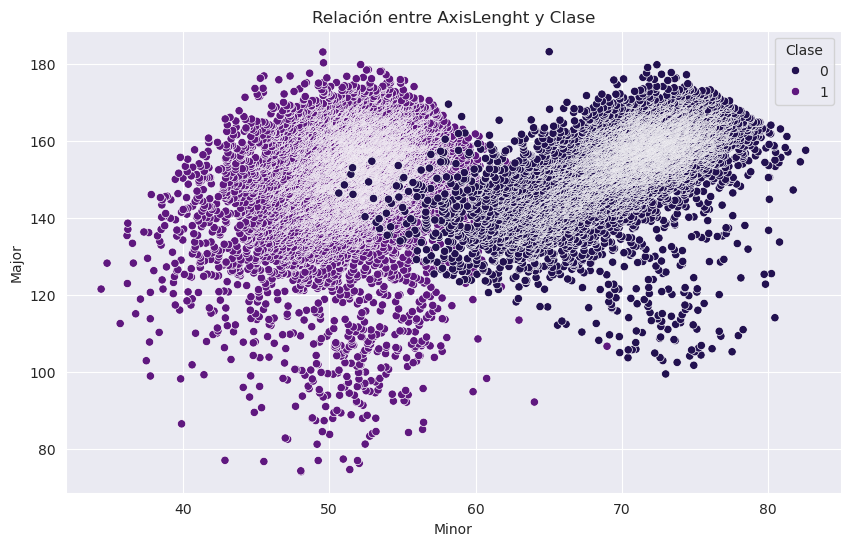

In [205]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MinorAxisLength', y='MajorAxisLength', data=data, hue='Class')
plt.title('Relación entre AxisLenght y Clase')
plt.xlabel('Minor')
plt.ylabel('Major')
plt.legend(title='Clase')
plt.show()

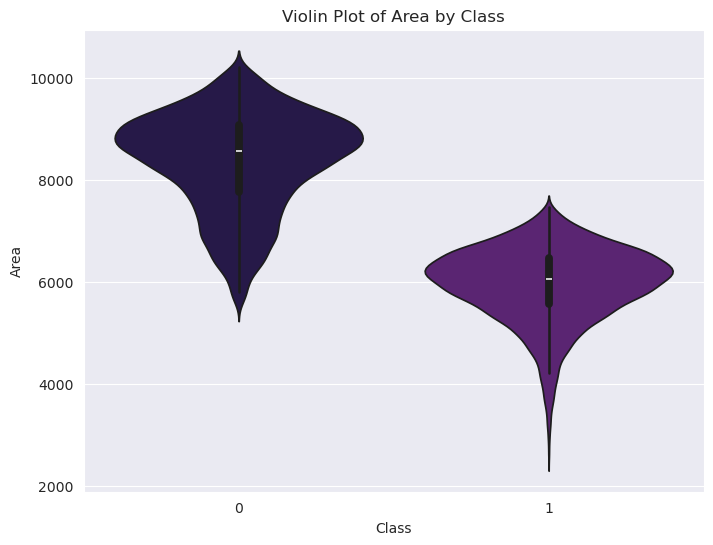

In [206]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y='Area', data=data, hue='Class', legend=False)
plt.title('Violin Plot of Area by Class')
plt.show()

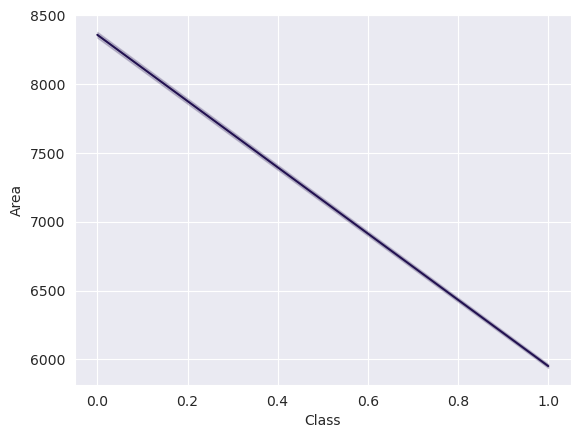

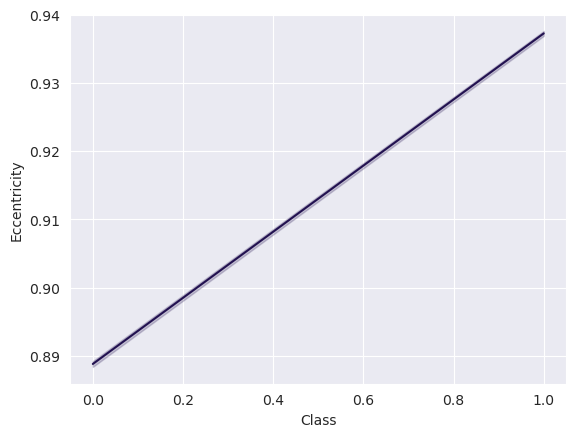

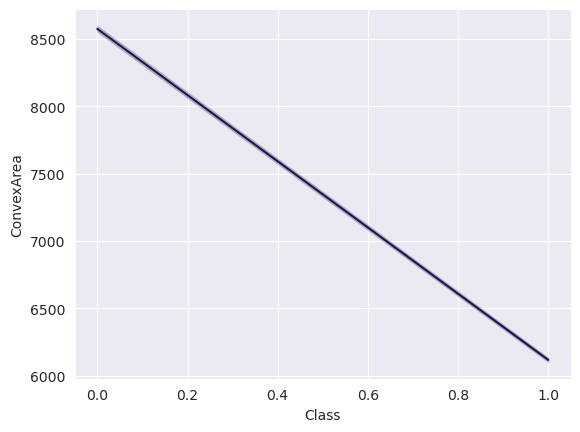

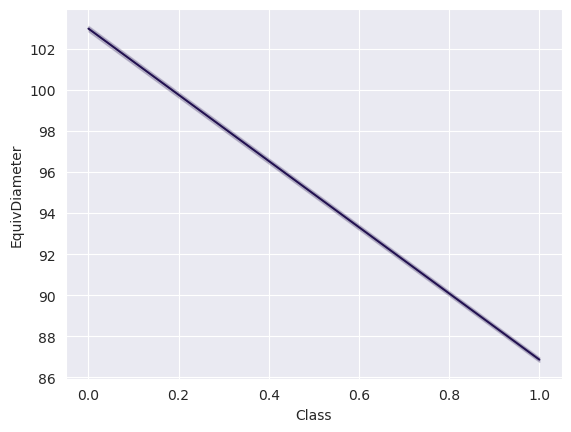

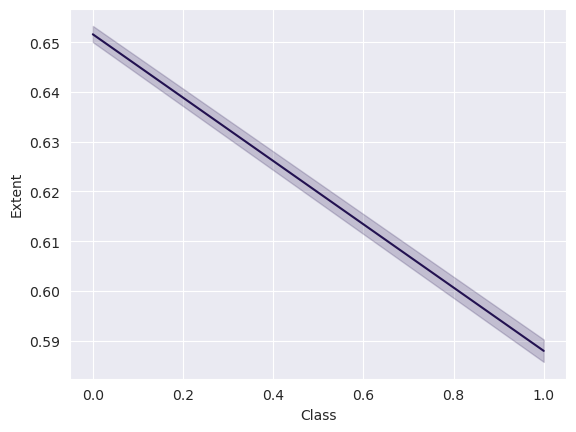

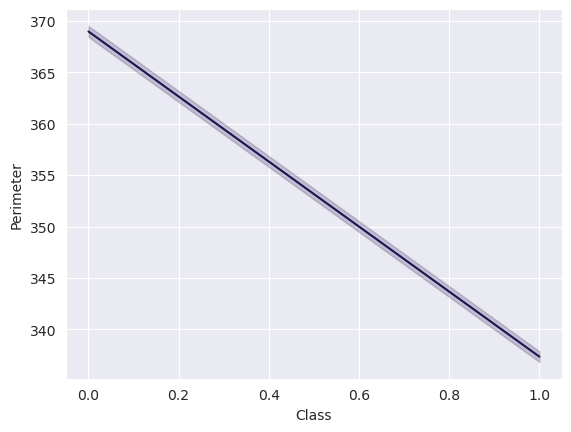

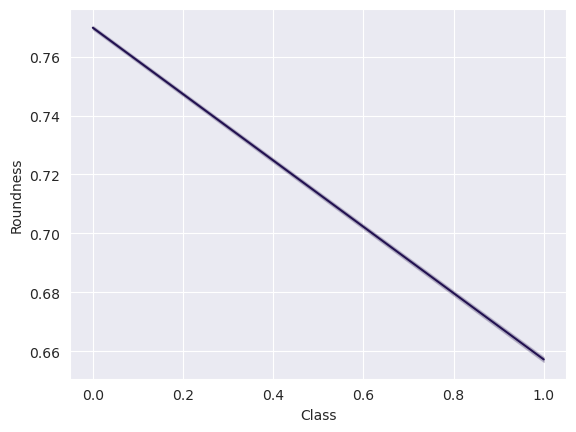

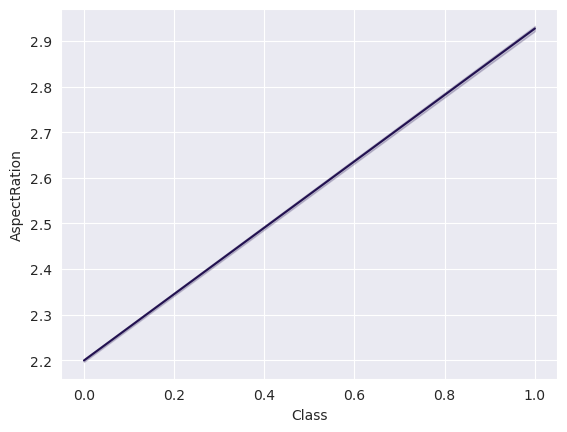

In [207]:
sns.lineplot(data=data, x="Class", y="Area")
plt.show()

sns.lineplot(data=data, x="Class", y="Eccentricity")
plt.show()

sns.lineplot(data=data, x="Class", y="ConvexArea")
plt.show()

sns.lineplot(data=data, x="Class", y="EquivDiameter")
plt.show()

sns.lineplot(data=data, x="Class", y="Extent")
plt.show()

sns.lineplot(data=data, x="Class", y="Perimeter")
plt.show()

sns.lineplot(data=data, x="Class", y="Roundness")
plt.show()

sns.lineplot(data=data, x="Class", y="AspectRation")
plt.show()


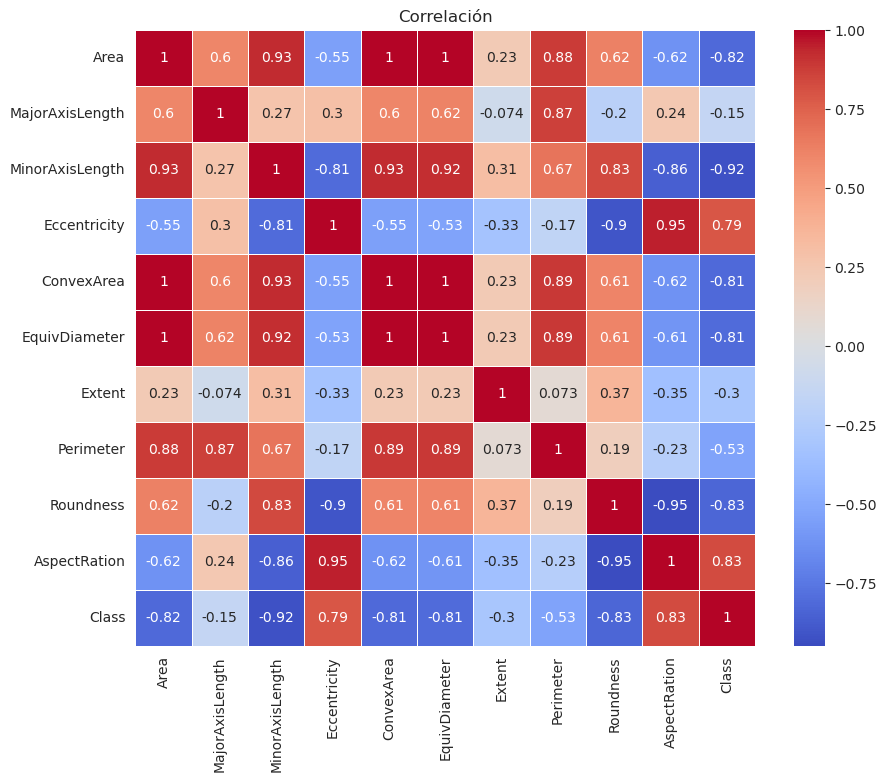

In [208]:
correlation_matrix = data.drop(columns='id').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación')
plt.show()

----------------

**Variable:** Class

**Tipo de problema:** Clasificación

----------------

## Preparación de los datos


In [209]:
data_vf= data.drop("id",axis=1)
data_vf = data_vf[['EquivDiameter','Area', 'Class']]

Tenemos que dividir los datos en x y en y

In [210]:
# Eje x: Eliminamos la variable a predecir del eje x, nos referimos a las columnas axis=1
X = data_vf.drop('Class',axis=1)
# Eje y: nuestra variable a predecir
y = data_vf['Class']

## Entrenar el modelo

Debemos dividir x y "y" en entrenamirnto y test

20% de los datos van a ser para evaluar el modelo
random_state=42 es una semilla que nos ayuda a aleatorizar los datos

In [211]:
from sklearn.model_selection import train_test_split

# "X" se divide en entrenamiento y test
# "y" se divide en entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print(f"X_train 80%: {X_train.shape}")
print(f"y_train 80%: {y_train.shape}")
print("\n")
print(f"X_test 20%: {X_test.shape}")
print(f"y_test 20%: {y_test.shape}")

X_train 80%: (14548, 2)
y_train 80%: (14548,)


X_test 20%: (3637, 2)
y_test 20%: (3637,)


**Normalizamos los datos**

Tenemos los datos en escalas mas cercanas para no tener rangos amplios

In [212]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Entrenar datos y transformarlos a datos normalizados o de entrenamiento
X_train_sc = sc.fit_transform(X_train)

# Solo transformamos los datos, no es necesario entrenar al modelo con estos datos porque estaríamos sesgando el modelo
X_test_sc = sc.transform(X_test)

## Regresión Logística
Vamos a realizar solo una regresión logística sin embargo es recomendado realizar varios modelos de machine learning para comparar los resultados.

In [213]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_sc,y_train)

y_pred_logreg = logistic_regression.predict(X_test_sc)
print(y_pred_logreg)

[0 1 0 ... 1 0 0]


In [214]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy Regresión Lineal: {X_train.shape}")
accuracy_rl_1 = accuracy_score(y_test,y_pred_logreg)
print(accuracy_score(y_test,y_pred_logreg))

Accuracy Regresión Lineal: (14548, 2)
0.9263128952433324


In [215]:
print(confusion_matrix(y_test,y_pred_logreg))

[[1442  190]
 [  78 1927]]


## Arbol de decisión

In [216]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# el criterio puede ser log_loss o entropy
treeclass = DecisionTreeClassifier(max_depth=5,criterion="log_loss")
# entrenar modelo
treeclass.fit(X_train_sc,y_train)
# extraemos predicción
y_pred_tree = treeclass.predict(X_test_sc)

#listar predicciones
print(y_pred_tree)

[0 1 0 ... 1 0 0]


In [217]:
# variables analizadas, se conserva el orden
print(X_train.columns)

Index(['EquivDiameter', 'Area'], dtype='object')


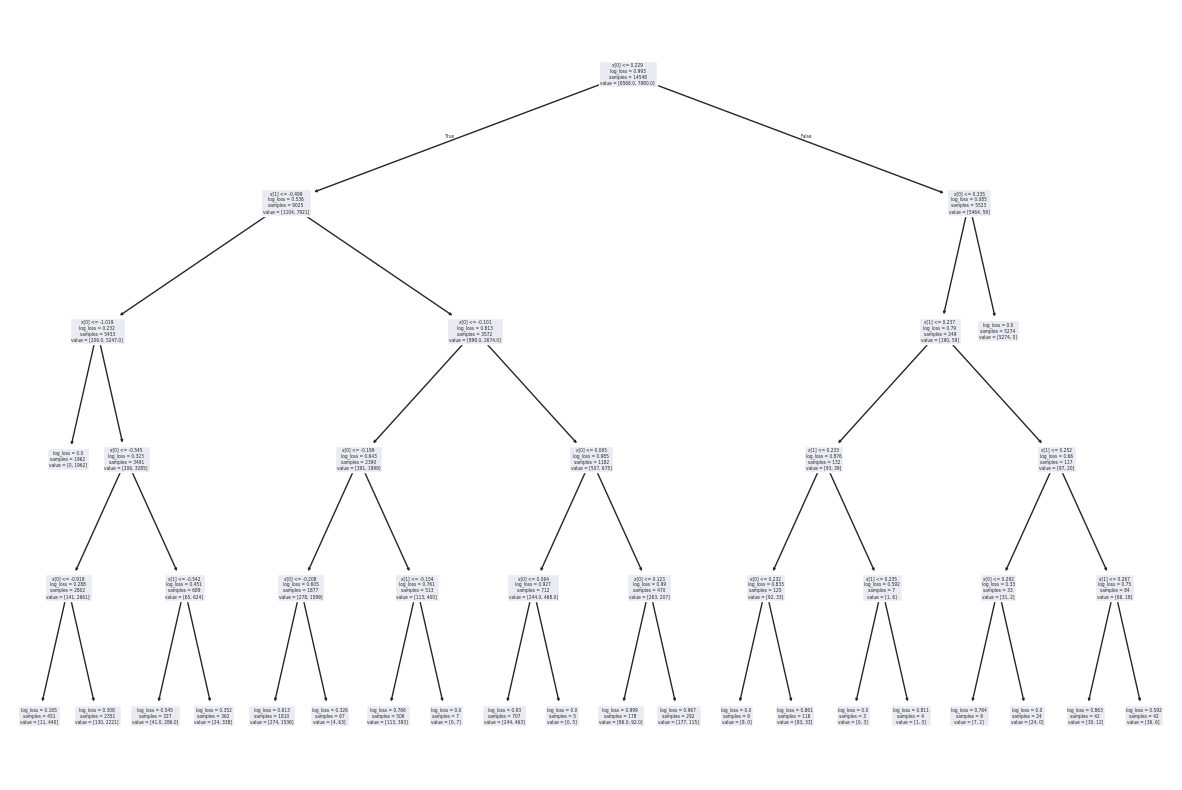

In [218]:
plt.figure(figsize=(15, 10))
plot_tree(treeclass)
plt.show()

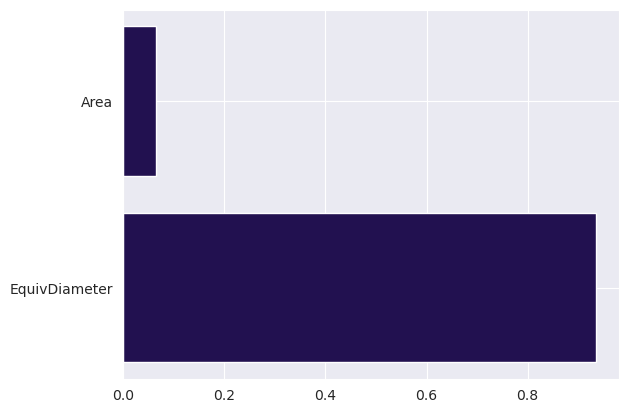

In [219]:
plt.barh(width=treeclass.feature_importances_,y=X_train.columns)
plt.show()

In [220]:
print(f"Regresión lineal: {accuracy_score(y_test,y_pred_logreg)}")
print(f"Arboles de decisión: {accuracy_score(y_test,y_pred_tree)}")

Regresión lineal: 0.9263128952433324
Arboles de decisión: 0.9301622216112181


In [221]:
print(f"Regresión lineal")
print(confusion_matrix(y_test,y_pred_logreg))

Regresión lineal
[[1442  190]
 [  78 1927]]


In [222]:
print("Arboles de decisión")
print(confusion_matrix(y_test,y_pred_tree))

Arboles de decisión
[[1415  217]
 [  37 1968]]


## XGBoost Classifier

In [223]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# learning rate va desde 0.001 hasta 0.1 porque cuando un modelo aprende demasiado rápido puede caer en overfiting
# n_estimators = numero de arboles, cuantos aprendices va a tener el modelo, es decir cuantos arboles de decisión
params = {'objective': 'binary:logistic', 'max_depth':4, 'learning_rate': 0.1, 'n_estimators': 150}

xgb_model = XGBClassifier(**params)
xgb_model.fit(X_train_sc,y_train)
y_pred_xgboost = xgb_model.predict(X_test_sc)
print(y_pred_xgboost)
print(f"Regresión lineal: {accuracy_score(y_test,y_pred_logreg)}")
print(f"Arboles de decisión: {accuracy_score(y_test,y_pred_tree)}")
print(f"XGBoost: {accuracy_score(y_test,y_pred_xgboost)}")

[0 1 0 ... 1 0 0]
Regresión lineal: 0.9263128952433324
Arboles de decisión: 0.9301622216112181
XGBoost: 0.9307121253780588


In [224]:
print(confusion_matrix(y_test,y_pred_xgboost))

[[1416  216]
 [  36 1969]]


## GridSearchCV

In [225]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

# subsample, identificar muestras para identificar cada uno de los modelos, 30%, 60% 80%
params_grid = {
    'learning_rate':[0.001,0.01,0.1,0.2],
    'subsample':[0.3,0.6,0.8],
    'n_estimators':[100,150,200]
    }

model_grid = XGBClassifier()


# GridSearch: Recorrer todas las posibles combinaciones, evaluar todas las opciones,
# cv, validación cruzada, partir en pliegues los datos para reducir el overfiting
grid_model = GridSearchCV(
    estimator=model_grid,
    param_grid=params_grid,
    cv=4,
    scoring='accuracy',
    verbose=1)


grid_model.fit(X_train_sc,y_train)
print(f"Mejores parámetros:\n {grid_model.best_params_}")
print(f"Mejor puntaje:\n {grid_model.best_score_}")

Fitting 4 folds for each of 36 candidates, totalling 144 fits
Mejores parámetros:
 {'learning_rate': 0.1, 'n_estimators': 150, 'subsample': 0.3}
Mejor puntaje:
 0.9226697827880121


## RandomizedSearchCV

In [226]:
# RandomSearch: encontrar los mejores parámetros y pausar
# n_iter: Iteraciones para detener el modelo
randsearch_model = RandomizedSearchCV(
    estimator=model_grid, 
    param_distributions=params_grid, 
    cv=4,
    scoring='accuracy',
    verbose=1,
    n_iter=25)

randsearch_model.fit(X_train_sc,y_train)
print(f"Mejores parámetros:\n {randsearch_model.best_params_}")
print(f"Mejor puntaje:\n {randsearch_model.best_score_}")

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Mejores parámetros:
 {'subsample': 0.3, 'n_estimators': 150, 'learning_rate': 0.1}
Mejor puntaje:
 0.9226697827880121


In [227]:
print(f"GridSearch score:\n {grid_model.best_score_}")
print(f"RandomSearch score:\n {randsearch_model.best_score_}")

GridSearch score:
 0.9226697827880121
RandomSearch score:
 0.9226697827880121


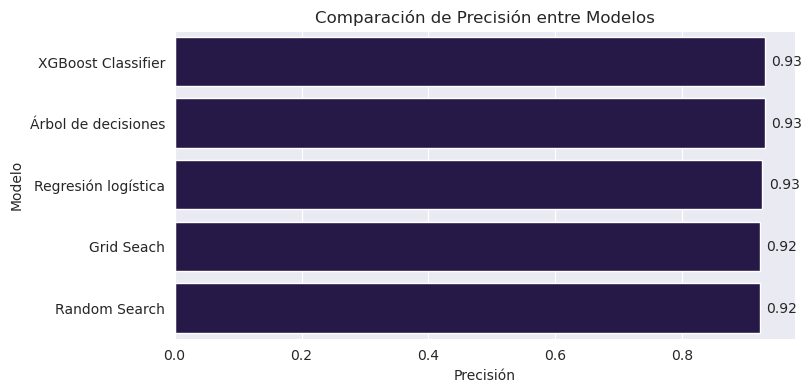

In [228]:
modelos = ['Árbol de decisiones', 'Regresión logística', 'XGBoost Classifier','Grid Seach','Random Search']
precision = [accuracy_score(y_test,y_pred_tree), accuracy_score(y_test,y_pred_logreg),accuracy_score(y_test,y_pred_xgboost),grid_model.best_score_,randsearch_model.best_score_]  

df = pd.DataFrame({'Modelo': modelos, 'Precisión': precision})

df = df.sort_values(by='Precisión', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Precisión', y='Modelo', data=df, orient='h')

plt.xlabel('Precisión')
plt.ylabel('Modelo')
plt.title('Comparación de Precisión entre Modelos')

for i, (precision, modelo) in enumerate(zip(df['Precisión'], df['Modelo'])):
    plt.text(precision + 0.01, i, f'{precision:.2f}', va='center')  

plt.show()

# Punto 2:

Despliegue un clustering K-Means para el siguiente caso de estudio. De modo que se pueda perfilar los grupos del clúster.

*   Caso de estudio: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_palette("magma")

## Analisis exploratorio de los datos

In [6]:
data = pd.read_csv('./data/Punto-2/wine-clustering.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## KMeans

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

from sklearn.decomposition import PCA

# **Reducir dimensionalidad**
# Transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales.
pca = PCA(n_components=5)
# transforma los datos originales en un nuevo espacio de menor dimensión
data_pca = pca.fit_transform(data_scaled)

print(f"explained_variance_ratio_: {pca.explained_variance_ratio_}")
print(f"explained_variance_ratio_ cumsum: {pca.explained_variance_ratio_.cumsum()}")
print(f"pca components: {pca.components_}")


total_variance = np.sum(pca.explained_variance_ratio_)
percentage = total_variance * 100

print(f"Porcentaje explained_variance_ratio_:\n {percentage:.2f}%")

explained_variance_ratio_: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
explained_variance_ratio_ cumsum: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293]
pca components: [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578

## Elbow

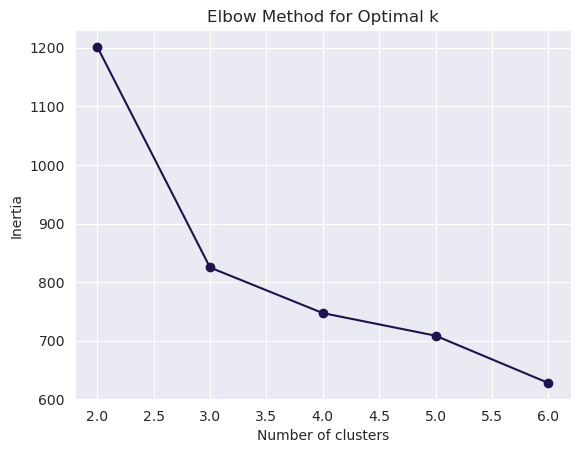

In [12]:
from sklearn.cluster import KMeans

inercia = []

# evalua los grupos 2,3,4,5,6,7,8,9
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    inercia.append(kmeans.inertia_)

plt.plot(range(2, 7), inercia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


---

3 clusters es el número óptimo de clusters

---

In [13]:
grupos = KMeans(n_clusters=3, random_state=42)
grupos.fit(data_pca)
print(f"Para todo el cojunto de datos a qué grupos pertenecen:\n {grupos.labels_}")

Para todo el cojunto de datos a qué grupos pertenecen:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


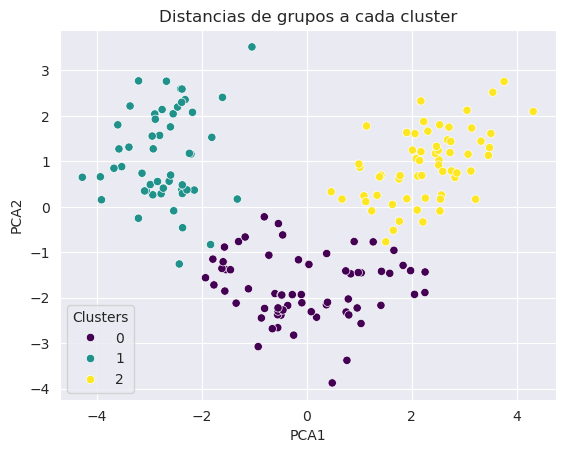

In [15]:
dataset_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])
dataset_pca['Clusters'] = grupos.labels_

# se selecciona PCA1 y PCA2 porque en los dos primeros componentes se tiene la mayor variabilidad de datos
sns.scatterplot(data=dataset_pca, x='PCA1', y='PCA2', hue='Clusters', palette="viridis")
plt.title('Distancias de grupos a cada cluster')
plt.show()

In [16]:
data['Clusters'] = grupos.labels_
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [17]:
data_segmentada = data.groupby('Clusters')

for label, data in data_segmentada:
    print(f"Cluster {label}:")
    print(data)
    print()

Cluster 0:
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
59     12.37        0.94  1.36          10.6         88           1.98   
60     12.33        1.10  2.28          16.0        101           2.05   
62     13.67        1.25  1.92          18.0         94           2.10   
63     12.37        1.13  2.16          19.0         87           3.50   
64     12.17        1.45  2.53          19.0        104           1.89   
..       ...         ...   ...           ...        ...            ...   
125    12.07        2.16  2.17          21.0         85           2.60   
126    12.43        1.53  2.29          21.5         86           2.74   
127    11.79        2.13  2.78          28.5         92           2.13   
128    12.37        1.63  2.30          24.5         88           2.22   
129    12.04        4.30  2.38          22.0         80           2.10   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
59         0.57    

## Clustering Jerárquico y Dendrogramas
Es util para identificar subgrupos dentro de los datos y entender las relaciones entre ellos


*   Métrica Euclidiana: significa que mide la distancia directa en el espacio euclidiano

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

**Método enlace completo, metrica euclidiana**

Calcula la máxima distancia entre puntos de dos clusters. Tiende a crear clusters más compactos.

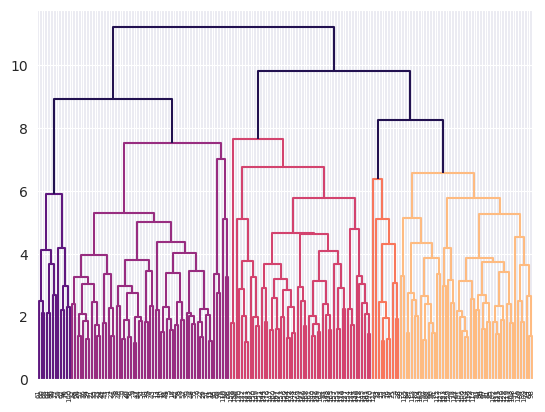

In [19]:
merge = linkage(data_scaled,method='complete',metric='euclidean')
dendrogram(merge,leaf_rotation=90)
plt.show()

**enlace promedio con métrica euclidiana**

Calcula la distancia promedio entre todos los puntos de dos clusters. Ofrece un balance entre los métodos de enlace simple y completo.

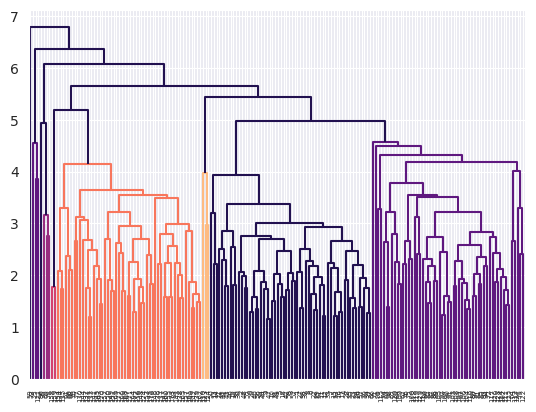

In [20]:
merge2 = linkage(data_scaled,method='average',metric='euclidean')
dendrogram(merge2,leaf_rotation=90)
plt.show()

**enlace simple con métrica euclidiana**

Calcula la mínima distancia entre puntos de dos clusters. Puede crear clusters largos y sueltos.

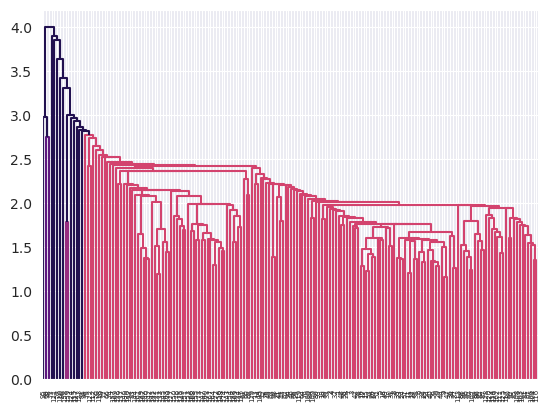

In [21]:
merge3 = linkage(data_scaled,method='single',metric='euclidean')
dendrogram(merge3,leaf_rotation=90)
plt.show()

## DBSCan

Identificar patrones anomalos, uniformizarlos, detectar ruido en los datos

[ 0 -1  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0
  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  1 -1 -1 -1  1  2 -1  1 -1 -1  1 -1
 -1 -1  2 -1 -1  1 -1  3 -1  1  1  4  2  1  1 -1  1  1  1  1  1  1  1  0
 -1 -1 -1  1  1 -1 -1  1  1  1  1  1  1  3  2  1 -1  1  1 -1  1  1 -1  1
  2 -1 -1 -1  3  1  1 -1  1  1 -1  4  4  4 -1  4 -1 -1  4  4  4  4  4  4
  4  4 -1  4  4  4  4  4 -1  4  4  4  4 -1 -1  4  4  4  4  4  4  4  4  4
  4 -1  4 -1  4  4  4  4  4 -1]


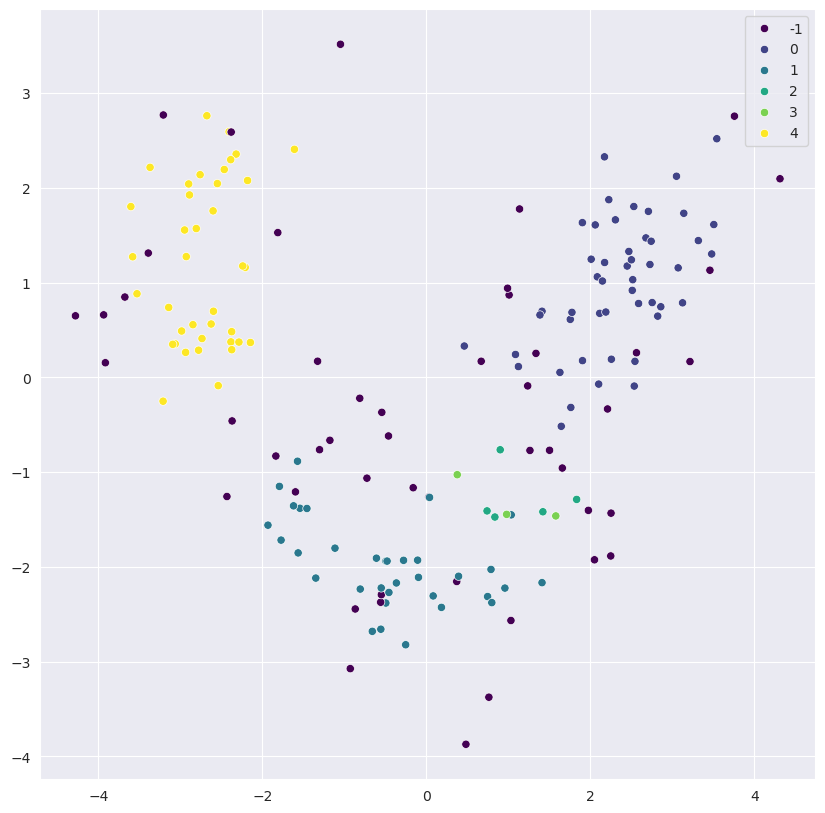

In [30]:
from sklearn.cluster import DBSCAN

# Reducir los datos a 2 componentes principales
pca2 = PCA(n_components=3)
data_pca2 = pca2.fit_transform(data_scaled)

# epsilon es distancia maxima con los vecinos
# eps=0.2: La distancia máxima entre dos muestras para que se consideren en el mismo vecindario.

# min_samples El número mínimo de muestras en un vecindario para que un punto sea considerado como un núcleo (core point).

cluster_dbscan = DBSCAN(eps=0.8, min_samples=4)
labels = cluster_dbscan.fit_predict(data_pca2)
print(labels)

plt.figure(figsize=(10, 10))
# recorrer todas las filas con el segundo componente
sns.scatterplot(x=data_pca2[:, 0], y=data_pca2[:, 1], hue=labels, palette='viridis')
plt.show()

# Punto 3:

Implementación de un sistema de recomendación con Scikit-surprise

*   Caso de estudio: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data?select=Ratings.csv

# Punto 4:

Desplegar para el siguiente caso de estudio un modelo de Deep learning con redes neuronales convolucionales.

*   Es importante mencionar que para este caso debe desplegar una arquitectura propia para la red neuronal convolucional.
*   Por otra parte, debe desplegar por lo menos 3 arquitecturas vistas en clase para el caso de estudio
*   Caso de estudio: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/data

# Punto 5:

 Desplegar para el siguiente caso de estudio una red neuronal recurrente con arquitectura LSTM y otra con GRU

*   Caso de estudio: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset
*   Realizar la predicción para el precio de la columna de la Adj Close en el dataset